# Image segmentation

### 1.   Model path and image test path

In [ ]:
# Model path
model_path = "/content/model.pkl"
# Image test path
img_tst = '/content/test.bmp'


### 2.  Feature extractions function

In [12]:
import cv2 as cv
import numpy as np
def preprocessing(image_path):
  image=cv.imread(image_path)

  # descirpteur: Intensités dans l'espace RGB
  imageRBG=cv.cvtColor(image, cv.COLOR_RGB2BGR)
  imgRGB_reshape=imageRBG.reshape(-1,3)

  # descirpteur: Intensités dans l'espace HSV
  imageHSV = cv.cvtColor(image, cv.COLOR_RGB2HSV)
  imgHSV_reshape=imageHSV.reshape(-1,3)

  
  
  # X = np.concatenate([imgRGB_reshape.T, imgHSV_reshape.T]).T
  X = np.concatenate([
        imgRGB_reshape.T,
        imgHSV_reshape.T,
    ]).T
  
  return X, image.shape

### 3.  Loading the model

In [13]:
import pickle
# Load the model
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

### 4.  Prediction

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

original_img = imread(img_tst)
# feature extractions
X_img, img_shape = preprocessing(img_tst)

y_pred = loaded_model.predict(X_img)
mask_new = y_pred.reshape(img_shape[:2])

### 5.  Results

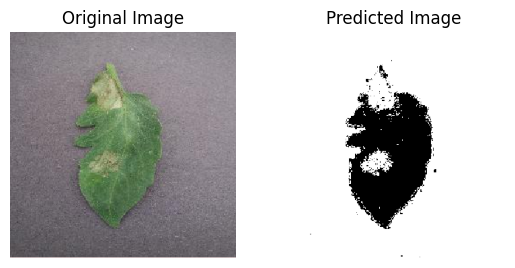

In [14]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")
# Display the predicted mask
plt.subplot(1, 2, 2)
plt.imshow(mask_new, cmap='Greys_r')
plt.title("Predicted Image")
plt.axis("off")
plt.show()